# San Francisco Fire Incidents
Fileset (1,5 GB): https://data.sfgov.org/api/views/nuek-vuh3/rows.csv?accessType=DOWNLOAD

In [1]:
import pandas as pd

df = pd.read_csv(
    r'C:\Users\Markus\Downloads\Fire_Department_Calls_for_Service.csv')
df.head()

C:\dev\apps\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
0,1030101,E18,306091,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:00:29 PM,04/12/2000 09:01:40 PM,04/12/2000 09:02:00 PM,NaN,...,False,NaN,1,ENGINE,1.0,8,4,Sunset/Parkside,"(37.7487247711275, -122.495504020186)",001030101-E18
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,...,True,NaN,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14
2,1030106,M36,30614,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,...,False,NaN,1,MEDIC,1.0,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:15:58 PM,...,False,NaN,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,...,False,NaN,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1


In [8]:
df.columns

Index(['Call Number', 'Unit ID', 'Incident Number', 'Call Type', 'Call Date',
       'Watch Date', 'Received DtTm', 'Entry DtTm', 'Dispatch DtTm',
       'Response DtTm', 'On Scene DtTm', 'Transport DtTm', 'Hospital DtTm',
       'Call Final Disposition', 'Available DtTm', 'Address', 'City',
       'Zipcode of Incident', 'Battalion', 'Station Area', 'Box',
       'Original Priority', 'Priority', 'Final Priority', 'ALS Unit',
       'Call Type Group', 'Number of Alarms', 'Unit Type',
       'Unit sequence in call dispatch', 'Fire Prevention District',
       'Supervisor District', 'Neighborhooods - Analysis Boundaries',
       'Location', 'RowID'],
      dtype='object')

In [10]:
len(df)

4548659

There are over 4 million rows in the DataFrame and it takes ~15-20 seconds to do a full read of it, maybe longer if your request gets blocked on AWS.

Now run the count again and see how long it takes on the cached data - it should take less than a second.

In [22]:
len(df['Call Type'].unique())

32

### Visualized the TOP 10 Call Types

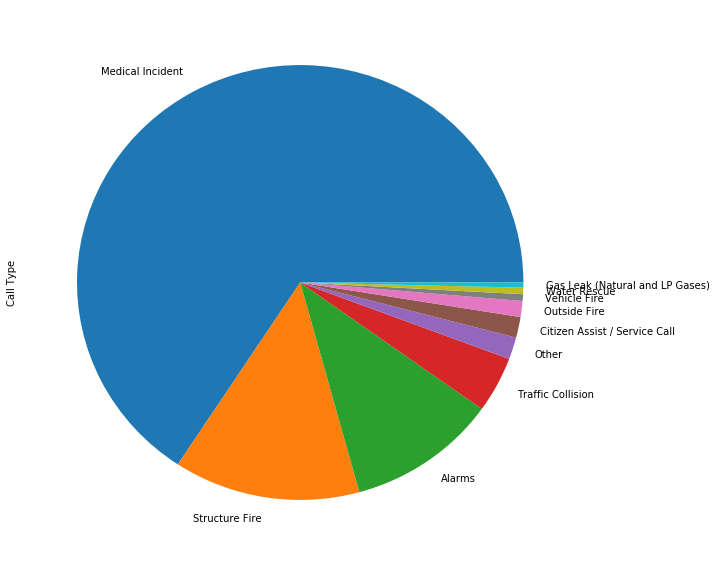

In [20]:
%matplotlib inline
df['Call Type'].value_counts().head(10).plot(kind='pie', figsize=(10,10))

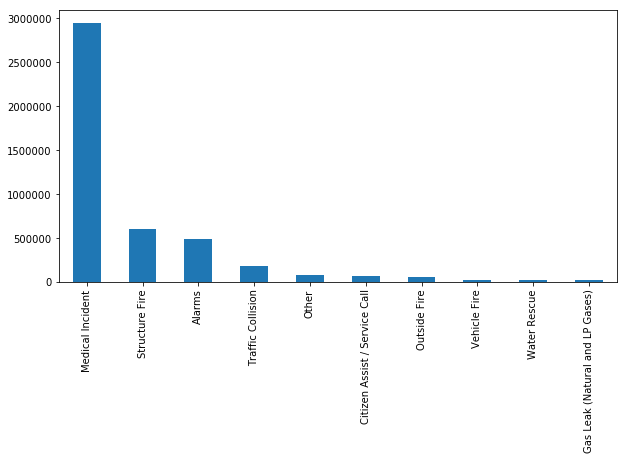

In [21]:
df['Call Type'].value_counts().head(10).plot(kind='bar', figsize=(10,5))

In [27]:
df.groupby('Call Type')["Unit ID"].count().sort_values(ascending=False)

Call Type
Medical Incident                                2945292
Structure Fire                                   604773
Alarms                                           486055
Traffic Collision                                186090
Other                                             73402
Citizen Assist / Service Call                     68879
Outside Fire                                      53059
Vehicle Fire                                      22291
Water Rescue                                      21689
Gas Leak (Natural and LP Gases)                   16807
Electrical Hazard                                 12695
Odor (Strange / Unknown)                          12277
Elevator / Escalator Rescue                       11905
Smoke Investigation (Outside)                      9982
Fuel Spill                                         5343
HazMat                                             3802
Industrial Accidents                               2785
Explosion                             

In [28]:
df.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
0,1030101,E18,306091,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:00:29 PM,04/12/2000 09:01:40 PM,04/12/2000 09:02:00 PM,NaN,...,False,NaN,1,ENGINE,1.0,8,4,Sunset/Parkside,"(37.7487247711275, -122.495504020186)",001030101-E18
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,...,True,NaN,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14
2,1030106,M36,30614,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,...,False,NaN,1,MEDIC,1.0,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:15:58 PM,...,False,NaN,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,...,False,NaN,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1


In [32]:
FORMAT = "%m/%d/%Y"
df["Call Date TS"] = pd.to_datetime(df['Call Date'], format=FORMAT)
df.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Call Date TS
0,1030101,E18,306091,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:00:29 PM,04/12/2000 09:01:40 PM,04/12/2000 09:02:00 PM,NaN,...,NaN,1,ENGINE,1.0,8,4,Sunset/Parkside,"(37.7487247711275, -122.495504020186)",001030101-E18,2000-04-12
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,...,NaN,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14,2000-04-12
2,1030106,M36,30614,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,...,NaN,1,MEDIC,1.0,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36,2000-04-12
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:15:58 PM,...,NaN,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01,2000-04-12
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,...,NaN,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1,2000-04-12


In [33]:
df['Call Date TS'].dt.year.value_counts()

2017    312471
2016    303967
2015    296244
2014    280905
2013    273097
2011    268689
2012    265596
2010    256174
2008    249690
2009    244633
2003    240457
2007    235856
2006    235440
2004    235353
2005    232919
2002    225951
2001    220328
2000    158154
2018     12735
Name: Call Date TS, dtype: int64

In [43]:
from datetime import datetime

july4 = datetime(2016, 7, 4, 0, 0, 0)
june27 = datetime(2016, 6, 27, 0, 0, 0)

subset = df[(df['Call Date TS'] >= june27) & (df['Call Date TS'] <= july4)]
subset.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Call Date TS
4021645,161842586,E36,16072812,Alarms,07/02/2016,07/02/2016,07/02/2016 05:31:27 PM,07/02/2016 05:32:41 PM,07/02/2016 05:33:10 PM,NaN,...,Alarm,1,ENGINE,2.0,2,8,Mission,"(37.76558714518, -122.424297645357)",161842586-E36,2016-07-02
4021674,161842586,T07,16072812,Alarms,07/02/2016,07/02/2016,07/02/2016 05:31:27 PM,07/02/2016 05:32:41 PM,07/02/2016 05:33:10 PM,NaN,...,Alarm,1,TRUCK,1.0,2,8,Mission,"(37.76558714518, -122.424297645357)",161842586-T07,2016-07-02
4055628,161794046,E07,16070984,Structure Fire,06/27/2016,06/27/2016,06/27/2016 10:25:42 PM,06/27/2016 10:27:07 PM,06/27/2016 10:27:34 PM,06/27/2016 10:28:16 PM,...,Alarm,1,ENGINE,7.0,2,8,Mission,"(37.7664900497694, -122.423775038029)",161794046-E07,2016-06-27
4055658,161794046,E36,16070984,Structure Fire,06/27/2016,06/27/2016,06/27/2016 10:25:42 PM,06/27/2016 10:27:07 PM,06/27/2016 10:27:34 PM,06/27/2016 10:28:27 PM,...,Alarm,1,ENGINE,10.0,2,8,Mission,"(37.7664900497694, -122.423775038029)",161794046-E36,2016-06-27
4055762,161801114,T03,16071118,Vehicle Fire,06/28/2016,06/28/2016,06/28/2016 09:49:23 AM,06/28/2016 09:51:01 AM,06/28/2016 09:51:18 AM,06/28/2016 09:53:10 AM,...,Fire,1,TRUCK,2.0,4,3,Nob Hill,"(37.7907373942464, -122.419872740428)",161801114-T03,2016-06-28


In [54]:
subset.groupby(pd.Grouper(key='Call Date TS', freq="D")).count()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
Call Date TS,,,,,,,,,,,,,,,,,,,,,
2016-06-27,809,809,809,809,809,809,809,809,809,789,...,809,809,809,809,809,809,809,809,809,809
2016-06-28,753,753,753,753,753,753,753,753,753,733,...,753,753,753,753,753,753,753,753,753,753
2016-06-29,731,731,731,731,731,731,731,731,731,711,...,731,731,731,731,731,731,731,731,731,731
2016-06-30,797,797,797,797,797,797,797,797,797,772,...,797,797,797,797,797,797,797,797,797,797
2016-07-01,847,847,847,847,847,847,847,847,847,816,...,847,847,847,847,847,847,847,847,847,847
2016-07-02,729,729,729,729,729,729,729,729,729,714,...,729,729,729,729,729,729,729,729,729,729
2016-07-03,797,797,797,797,797,797,797,797,797,786,...,797,797,797,797,797,797,797,797,797,797
2016-07-04,958,958,958,958,958,958,958,958,958,939,...,958,958,958,958,958,958,958,958,958,958


In [62]:
subset.groupby(subset['Call Date TS'].dt.weekday_name).count()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Call Date TS
Call Date TS,,,,,,,,,,,,,,,,,,,,,
Friday,847,847,847,847,847,847,847,847,847,816,...,847,847,847,847,847,847,847,847,847,847
Monday,1767,1767,1767,1767,1767,1767,1767,1767,1767,1728,...,1767,1767,1767,1767,1767,1767,1767,1767,1767,1767
Saturday,729,729,729,729,729,729,729,729,729,714,...,729,729,729,729,729,729,729,729,729,729
Sunday,797,797,797,797,797,797,797,797,797,786,...,797,797,797,797,797,797,797,797,797,797
Thursday,797,797,797,797,797,797,797,797,797,772,...,797,797,797,797,797,797,797,797,797,797
Tuesday,753,753,753,753,753,753,753,753,753,733,...,753,753,753,753,753,753,753,753,753,753
Wednesday,731,731,731,731,731,731,731,731,731,711,...,731,731,731,731,731,731,731,731,731,731
